In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./Data/mnist.csv')
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_standardized = StandardScaler().fit_transform(X)


In [4]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_standardized)

# result_df = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10'])
# result_df.insert(0, 'label', y)
# result_df.to_csv('MNIST_PCA.csv', index=False)


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0, n_init='auto')
kmeans.fit(X_standardized)


KMeans(n_clusters=10, n_init='auto', random_state=0)

In [6]:
kmeans.cluster_centers_.shape

(10, 784)

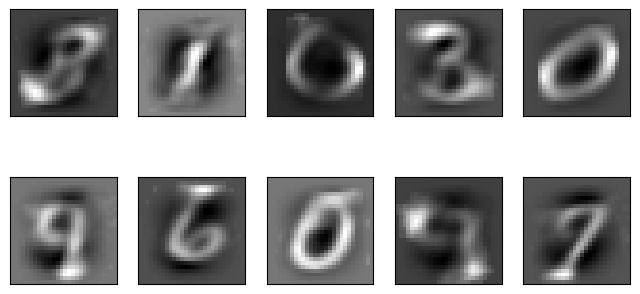

In [7]:
import matplotlib.pyplot as plt

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot the centers as 28x28 images
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for ax, center in zip(axes.ravel(), centers):
    ax.matshow(center.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [8]:
from sklearn.cluster import KMeans

inertia = []
iterations = range(1, 21)

for i in iterations:
    kmeans = KMeans(n_clusters=10, max_iter=i, n_init=1, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

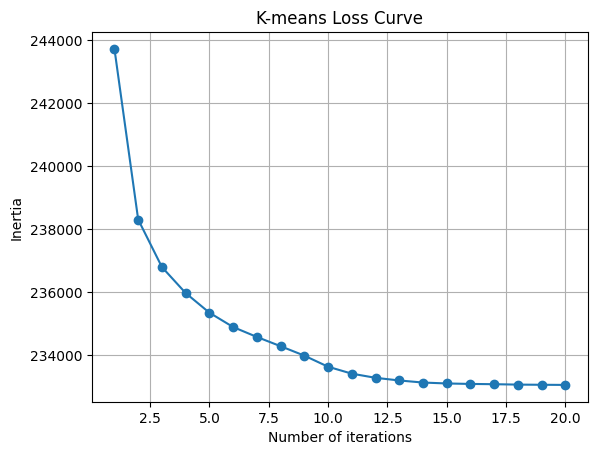

In [9]:

plt.plot(iterations, inertia, marker='o')
plt.title('K-means Loss Curve')
plt.xlabel('Number of iterations')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [10]:

X_train, X_val = X[:4000], X[4000:]
y_train, y_val = y[:4000], y[4000:]

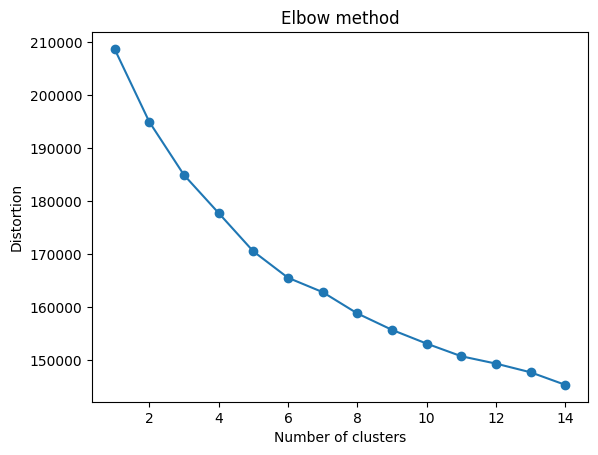

In [11]:
distortions = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [12]:
from sklearn.metrics import silhouette_score

best_k = 10  # Replace with the best k you found
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init='auto')
kmeans.fit(X_train)

labels = kmeans.predict(X_val)
silhouette_avg = silhouette_score(X_val, labels)
print("For n_clusters =", best_k, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 10 The average silhouette_score is : 0.06691566908988608


In [13]:
# X = data.iloc[:, 1:]
# y = data.iloc[:, 0]

X = data.iloc[:, 1:].iloc[:500]
y = data.iloc[:, 0].iloc[:500]

In [14]:
# import numpy as np

# def rbf_kernel(X, sigma_square):
#     norm = np.sum(X**2, axis=1).reshape(-1, 1)
#     K = np.exp(- (norm + norm.T - 2 * np.dot(X, X.T)) / (2 * sigma_square))
#     return K

# N = X.shape[0]
# distance_matrix = np.linalg.norm(X.values[:, None] - X.values, axis=2)**2
# sigma_square = np.sum(distance_matrix) / (N**2)
# K = rbf_kernel(X, sigma_square)


In [15]:
def rbf_kernel(X, sigma_square):
    norm = np.sum(X**2, axis=1).reshape(-1, 1)
    K = np.exp(- (norm + norm.T - 2 * np.dot(X, X.T)) / (2 * sigma_square))
    return K

# Assuming X is a pandas DataFrame or Series
# If X is a Series, convert it to a DataFrame
if isinstance(X, pd.Series):
    X = X.to_frame()

# Convert X to a NumPy array
X_values = X.values

N = X_values.shape[0]
distance_matrix = np.linalg.norm(X_values[:, None] - X_values, axis=2)**2
sigma_square = np.sum(distance_matrix) / (N**2)
K = rbf_kernel(X_values, sigma_square)

In [16]:
# from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(K)
labels = kmeans.labels_


/Users/jesse/Documents/23S2Code/COMP7314Repo/Assign3_PCA-Kernel/my_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)


In [19]:
X.shape

(500, 784)

In [ ]:

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar()
plt.show()
